# Load and inspect dataset structure

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Using widget in Jupyter Lab
%matplotlib widget

In [2]:
train_features = pd.read_csv('./data/raw/train_features.csv')
train_salaries = pd.read_csv('./data/raw/train_salaries.csv')

### TODO: add in more generic data set structure analysis, missing values etc

In [3]:
train_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
train_features[['companyId', 'jobType', 'degree', 'major', 'industry']].apply(lambda x: x.nunique())

companyId    63
jobType       8
degree        5
major         9
industry      7
dtype: int64

In [5]:
train_features.major.value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [6]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


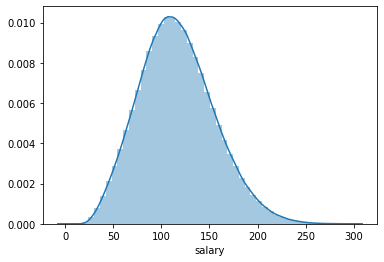

In [7]:
sns.distplot(train_salaries.salary)
plt.show()

### Join salary and job description features

In [8]:
salaries_all = train_features.set_index('jobId').join(train_salaries.set_index('jobId'))

In [9]:
salaries_all.reset_index(inplace=True)

In [10]:
salaries_all.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [11]:
salaries_all.apply(lambda x: sum(x.isna()))

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

Save the joined data with salaries and features combined

In [12]:
# salaries_all.to_csv('data/interim/salaries_train_all.csv')

In [13]:
salaries_all

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


# Salaries per Job Type

In [14]:
avg_salary_per_jobtype = salaries_all.groupby('jobType').salary.mean().to_frame().reset_index()

In [15]:
avg_salary_per_jobtype.sort_values(by = 'salary', inplace = True)
avg_salary_per_jobtype

,jobType,salary
3,JANITOR,70.813045
4,JUNIOR,95.331557
6,SENIOR,105.487775
5,MANAGER,115.367596
7,VICE_PRESIDENT,125.367629
1,CFO,135.458547
2,CTO,135.479983
0,CEO,145.311425


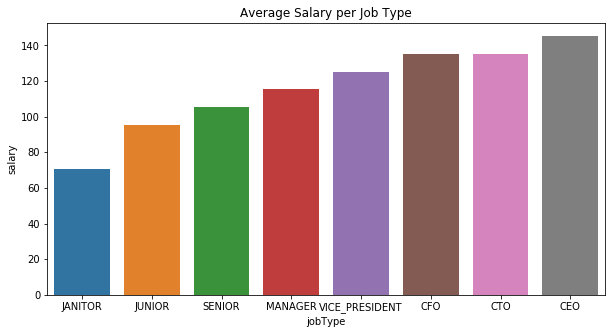

In [16]:
plt.figure(figsize=[10,5])
sns.barplot(x = 'jobType', y = 'salary', data = avg_salary_per_jobtype)
plt.title('Average Salary per Job Type')
plt.show()

### Salaries per Degree

In [17]:
avg_salary_per_degree = salaries_all.groupby('degree').salary.mean().to_frame().reset_index()
avg_salary_per_degree.sort_values(by = 'salary', inplace = True)
avg_salary_per_degree

,degree,salary
4,NONE,98.176467
2,HIGH_SCHOOL,101.920654
0,BACHELORS,125.454663
3,MASTERS,130.504903
1,DOCTORAL,135.489433


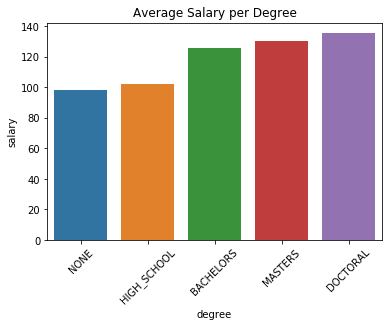

In [18]:
sns.barplot(x = 'degree', y = 'salary', data = avg_salary_per_degree)
plt.xticks(rotation = 45)
plt.title('Average Salary per Degree')
plt.show()

Having education beyond high school seems to play a big role in increased salary. However the gains from bachelors to graduate and post graduate degrees seem to be smaller.

### Salaries per Job per Degree

In [19]:
salary_per_degree_per_jobtype = salaries_all.groupby(['jobType', 'degree']).salary.mean()
salary_per_degree_per_jobtype = salary_per_degree_per_jobtype.to_frame().reset_index()
salary_per_degree_per_jobtype.degree = salary_per_degree_per_jobtype.degree.astype(dtype = 'category')
salary_per_degree_per_jobtype.jobType = salary_per_degree_per_jobtype.jobType.astype(dtype = 'category')
salary_per_degree_per_jobtype.degree.cat.set_categories(['NONE', 'HIGH_SCHOOL', 'BACHELORS', 'MASTERS', 'DOCTORAL'], ordered = True, inplace = True)
salary_per_degree_per_jobtype.jobType.cat.set_categories(['JANITOR', 'JUNIOR', 'SENIOR', 'MANAGER', 'VICE_PRESIDENT', 'CFO', 'CTO', 'CEO'], ordered = True, inplace = True)

In [20]:
salary_per_degree_per_jobtype.head(10)

,jobType,degree,salary
0,CEO,BACHELORS,148.421009
1,CEO,DOCTORAL,158.232849
2,CEO,HIGH_SCHOOL,135.629182
3,CEO,MASTERS,153.254510
4,CEO,NONE,130.796690
5,CFO,BACHELORS,138.508706
6,CFO,DOCTORAL,148.308742
7,CFO,HIGH_SCHOOL,125.964395
8,CFO,MASTERS,143.316243
9,CFO,NONE,121.135389


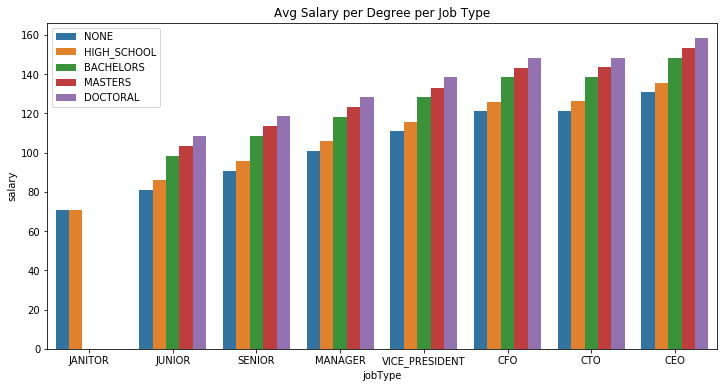

In [21]:
plt.figure(figsize=[12,6])
sns.barplot(x='jobType', y='salary', hue='degree', data=salary_per_degree_per_jobtype)
plt.legend(loc='upper left')
plt.title('Avg Salary per Degree per Job Type')
plt.show()

## TODO: take a look at majors and industries
Come up with a plan for the rest of the EDA a and feature creation

### Salaries per industry and jobtype

In [22]:
# Avg salary per Industry
avg_salary_per_industry = salaries_all.groupby('industry').salary.mean().reset_index().sort_values('salary')
avg_salary_per_industry

,industry,salary
1,EDUCATION,99.448386
5,SERVICE,104.446820
0,AUTO,109.433690
3,HEALTH,115.735540
6,WEB,121.644512
2,FINANCE,130.746743
4,OIL,130.952946


Salary per jobtype per industry

In [23]:
salary_per_industry_per_jobtype = salaries_all.groupby(['industry', 'jobType']).salary.mean().reset_index()
salary_per_industry_per_jobtype.industry = salary_per_industry_per_jobtype.industry.astype('category')
salary_per_industry_per_jobtype.jobType = salary_per_industry_per_jobtype.jobType.astype('category')
salary_per_industry_per_jobtype.industry.cat.set_categories(avg_salary_per_industry.industry, ordered = True, inplace = True)
salary_per_industry_per_jobtype.jobType.cat.set_categories(avg_salary_per_jobtype.jobType, ordered = True, inplace = True)

salary_per_industry_per_jobtype.head(10)

,industry,jobType,salary
0,AUTO,CEO,139.126480
1,AUTO,CFO,128.866016
2,AUTO,CTO,128.752108
3,AUTO,JANITOR,64.741013
4,AUTO,JUNIOR,88.666143
5,AUTO,MANAGER,108.540599
6,AUTO,SENIOR,98.878101
7,AUTO,VICE_PRESIDENT,118.674694
8,EDUCATION,CEO,128.306144
9,EDUCATION,CFO,118.775361


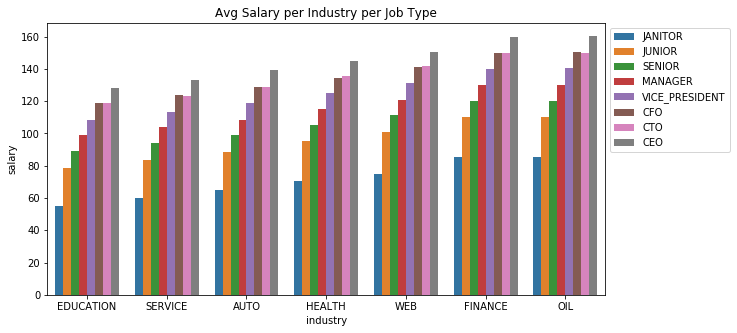

In [27]:
plt.figure(figsize=[10,5])
sns.barplot(x = 'industry', y = 'salary', hue  = 'jobType', data = salary_per_industry_per_jobtype)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.title('Avg Salary per Industry per Job Type')
plt.show()

The difference between industries does not have as pronounced of an effect on the salary, but rather it appears that the job type is more determinant

- Industry may be a candidate for removal to see if model performance improves without it

- TODO: pivot a table to see what the average difference is between ceo and janitors, and compare it to the difference in salary between oil and education industries

### Salaries per major